<a href="https://www.kaggle.com/code/llkh0a/xgboost-lightgbm-catboost-ensemble-forbegginers?scriptVersionId=244411323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Prices Prediction Notebook
This notebook is part of a Kaggle competition to predict house prices using various machine learning models. The workflow includes:

1. Data Loading and Exploration
2. Feature Engineering
3. Model Training and Evaluation
4. Hyperparameter Tuning
5. Generating Submission Files

The models used include XGBoost, LightGBM, and CatBoost, with an ensemble model for improved performance.

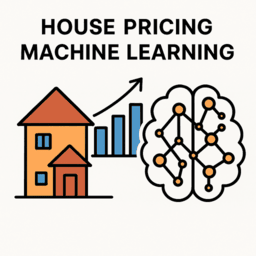

the first version i used GridSearchCV
achived: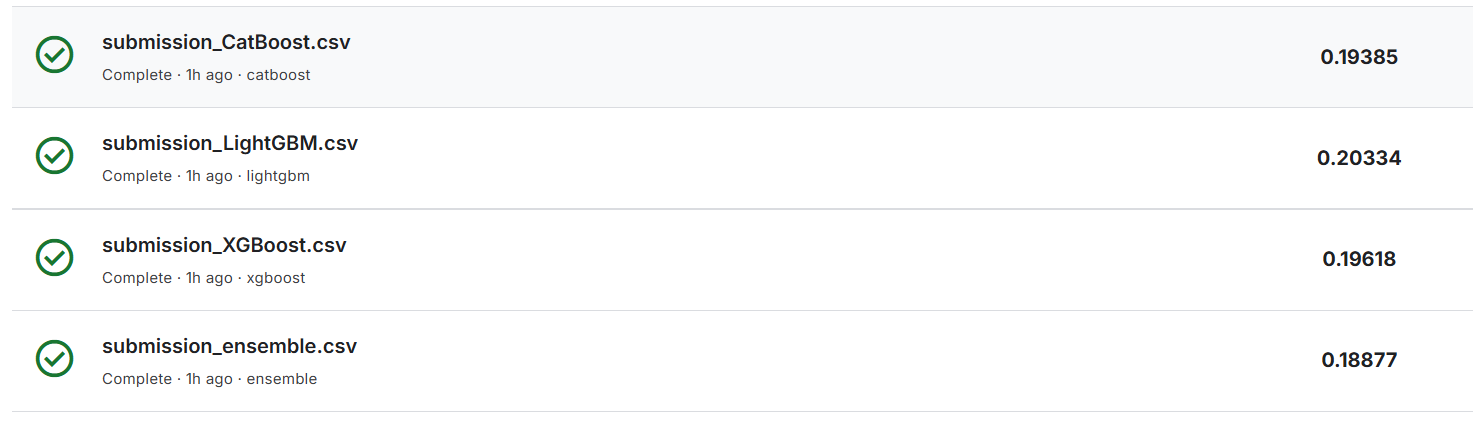

for the latest version i used RandomizedSearchCV for params-tuning

## Data Loading and Exploration
In this section, we load the training and test datasets, and perform initial exploration to understand the data structure and identify missing values.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# Load the training dataset
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# Display the first few rows of the dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check for missing values in the dataset
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Check for missing values in the dataset
missing_values = test_df.isnull().sum()
missing_values[missing_values > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [6]:
# Summary statistics of the dataset
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#print category columns
print(train_data.select_dtypes(include=['object']).columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Feature Engineering
Here, we perform feature engineering, including target encoding for categorical features and dropping irrelevant columns.

In [9]:
# Perform target encoding for categorical features
from sklearn.model_selection import KFold

# Define a function for target encoding
def target_encode(df, cat_features, target):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for col in cat_features:
        df[col + '_encoded'] = 0.0  # Ensure it's of type float initially
        for train_idx, valid_idx in kf.split(df):
            train_fold, valid_fold = df.iloc[train_idx], df.iloc[valid_idx]
            means = train_fold.groupby(col)[target].mean()
            df.loc[valid_idx, col + '_encoded'] = df.loc[valid_idx, col].map(means)
        # Fill missing values and reassign back to the column
        df[col + '_encoded'] = df[col + '_encoded'].fillna(df[target].mean())
        df[col + '_encoded'] = df[col + '_encoded'].astype(float)  # Explicitly cast to float
    return df

# Apply target encoding to the training data
categorical_features = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
train_data = target_encode(train_data, categorical_features, 'SalePrice')

# Drop original categorical columns
train_data = train_data.drop(columns=categorical_features)


In [10]:
train_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_encoded', 'LotShape_encoded',
       'LandContour_encoded', 'LotConfig_encoded', 'LandSlope_encoded',
       'Neighborhood_encoded', 'Condition1_encoded', 'Condition2_encoded',
       'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded',
       'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded',
       'MasVnrType_enc

In [11]:
# Exclude irrelevant features
irrelevant_features = [ 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 'Utilities', 'MoSold', 'MiscVal']
X = train_data.drop(irrelevant_features + ['SalePrice','Id'], axis=1)
y = train_data['SalePrice']

In [12]:
from tqdm import tqdm

In [13]:
# Handle the test set similarly
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [14]:
# Apply target encoding to the test data using training data mappings
for col in categorical_features:
    # Calculate means based on the training data
    means = train_data.groupby(col + '_encoded')['SalePrice'].mean()
    
    # Apply the target encoding mapping to the test data
    test_data[col + '_encoded'] = test_data[col].map(means)
    
    # Fill missing values with the mean of 'SalePrice' from the training data
    test_data[col + '_encoded'] = test_data[col + '_encoded'].fillna(train_data['SalePrice'].mean())


In [15]:

# Drop original categorical columns from the test data
test_data.drop(columns=categorical_features, inplace=True)
test_data = test_data.drop(irrelevant_features, axis=1)



## Models parameters tuning 
We used different params for each machine learning models, evaluate their performance using RMSE, using GridSearchCV.

let's frist declare the models

In [30]:

# Use an imputer to handle missing values
# from sklearn.impute import SimpleImputer
# Build the ensemble model
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'XGBoost': XGBRegressor(
        tree_method='hist',      # modern histogram method
        device='cpu',           # use cPU
        random_state=42
    ),
    'LightGBM': LGBMRegressor(
        # device='gpu',          # Try without GPU to rule out GPU-related issues
        random_state=42,
        min_child_samples=50,    # Increase further - require many samples per leaf
        min_split_gain=0.01,      # Increase minimum required gain
        max_depth=2,             # Further limit tree depth
        num_leaves=15,           # Reduce number of leaves
        reg_alpha=0.1,           # Add L1 regularization
        reg_lambda=0.1,          # Add L2 regularization
        min_data_in_bin=5,        # Control binning
        verbosity=-1
    ),
    'CatBoost': CatBoostRegressor(
        task_type='GPU',         # GPU for training
        devices='0',             # use first GPU
        verbose=0,
        random_state=42
    )
}


## params tuning using GridSearchCV

In [17]:
# # Fine-tune models using GridSearchCV
# from sklearn.model_selection import GridSearchCV

# # Define parameter grids
# param_grids = {
#     'XGBoost': {
#         'n_estimators': [100, 200, 300, 500],
#         'learning_rate': [0.01, 0.05, 0.1, 0.2],
#         'max_depth': [3, 6, 10, 15],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0]
#     },
#     'LightGBM': {
#         'n_estimators': [100, 200, 300, 500],
#         'learning_rate': [0.01, 0.05, 0.1, 0.2],
#         'num_leaves': [31, 50, 100, 150],
#         'feature_fraction': [0.6, 0.8, 1.0],
#         'bagging_fraction': [0.6, 0.8, 1.0]
#     },
#     'CatBoost': {
#         'iterations': [100, 200, 300, 500],
#         'learning_rate': [0.01, 0.05, 0.1, 0.2],
#         'depth': [3, 6, 10, 15],
#         'l2_leaf_reg': [1, 3, 5, 7]
#     }
# }

# # Perform Grid Search for each model
# best_params = {}
# for name, model in tqdm(models.items()):
#     print(f'Tuning {name}...')
#     grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_root_mean_squared_error', verbose=1)
#     grid_search.fit(X_train, y_train)
#     best_params[name] = grid_search.best_params_
#     print(f'Best parameters for {name}: {grid_search.best_params_}')

# # Display the best parameters
# print('Best parameters for all models:', best_params)

## params tuning using RandomizedSearchCV 

In [26]:
#keep the output clean
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Split the data
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distributions for RandomizedSearch
xgb_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
}

lgb_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
}

catboost_param_dist = {
    'iterations': randint(50, 300),
    'depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'l2_leaf_reg': uniform(1, 10),
}

In [32]:
# Initialize RandomizedSearchCV for each model
xgb_search = RandomizedSearchCV(
    estimator=models['XGBoost'],
    param_distributions=xgb_param_dist,
    n_iter=150,                   # Number of random combinations to try
    cv=3,                        # 3-fold cross-validation
    n_jobs=1,                   # Use all CPU cores
    verbose=1,
    random_state=42
)

lgb_search = RandomizedSearchCV(
    estimator=models['LightGBM'],
    param_distributions=lgb_param_dist,
    n_iter=150,
    cv=3,
    n_jobs=1,
    verbose=-1,
    random_state=42
)

catboost_search = RandomizedSearchCV(
    estimator=models['CatBoost'],
    param_distributions=catboost_param_dist,
    n_iter=150,
    cv=3,
    n_jobs=1,
    verbose=1,
    random_state=42
)

In [33]:
# Fit the models using RandomizedSearchCV
xgb_search.fit(X_train, y_train)
lgb_search.fit(X_train, y_train)
catboost_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fb07ff0cb90>,
                   n_iter=2, n_jobs=1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb072f28210>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb0733f6090>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb0733d9450>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb072f2a1d0>},
                   random_state=42, verbose=1)

In [ ]:
# Get the best parameters for each model
best_params = {
    'XGBoost': xgb_search.best_params_,
    'LightGBM': lgb_search.best_params_,
    'CatBoost': catboost_search.best_params_
}

# Print best params for reference
print("Best XGBoost Params:", best_params['XGBoost'])
print("Best LightGBM Params:", best_params['LightGBM'])
print("Best CatBoost Params:", best_params['CatBoost'])

## Models training
This section involves training models using the best hyperparameters of the process above to achieve optimal performance.

In [ ]:

# Train and evaluate each model
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    print(f'{name} RMSE: {rmse}')

In [ ]:
# Train models with the best parameters after tuning
final_models = {
    'XGBoost': XGBRegressor(**best_params['XGBoost'], random_state=42),
    'LightGBM': LGBMRegressor(**best_params['LightGBM'], random_state=42),
    'CatBoost': CatBoostRegressor(**best_params['CatBoost'], verbose=0, random_state=42)
}

# Train each model on the full training data
for name, model in final_models.items():
    print(f'Training {name}...')
    model.fit(X, y)
    print(f'{name} training complete.')

In [ ]:
#print rmse for each model
for name, model in final_models.items():
    predictions = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    print(f'{name} RMSE: {rmse}')

In [ ]:
test_data.columns

## Generating Submission Files
Finally, we generate submission files for individual models and an ensemble model by averaging their predictions.

In [ ]:
# Drop the 'Id' column from the test dataset before making predictions
test_data = test_data.drop(columns=['Id'], errors='ignore')

# Create submission files for each model and an ensemble
# Individual model predictions
for name, model in final_models.items():
    print(f'Creating submission for {name}...')
    predictions = model.predict(test_data)
    submission = pd.DataFrame({'Id': pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id'], 'SalePrice': predictions})
    submission.to_csv(f'submission_{name}.csv', index=False)

# Ensemble prediction (average of all models)
print('Creating ensemble submission...')
ensemble_predictions = sum(model.predict(test_data) for model in final_models.values()) / len(final_models)
ensemble_submission = pd.DataFrame({'Id': pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id'], 'SalePrice': ensemble_predictions})
ensemble_submission.to_csv('submission_ensemble.csv', index=False)
print('All submission files created.')